In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from pylab import rcParams

In [2]:
df = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# to check presence of missing observations
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# to print unique values in all columns
unique_columns = [col+" "+df[col].unique() for col in df.select_dtypes(exclude=np.number)]
unique_columns

[array(['gender female', 'gender male'], dtype=object),
 array(['race/ethnicity group B', 'race/ethnicity group C',
        'race/ethnicity group A', 'race/ethnicity group D',
        'race/ethnicity group E'], dtype=object),
 array(["parental level of education bachelor's degree",
        'parental level of education some college',
        "parental level of education master's degree",
        "parental level of education associate's degree",
        'parental level of education high school',
        'parental level of education some high school'], dtype=object),
 array(['lunch standard', 'lunch free/reduced'], dtype=object),
 array(['test preparation course none',
        'test preparation course completed'], dtype=object)]

In [8]:
#Creating a column Gender1 - where it assumes value 1 when gender = female

gender1 = [1 if each == "female" else 0 for each in df.gender]

df['Gender1']=gender1

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Gender1
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,0
5,female,group B,associate's degree,standard,none,71,83,78,1
6,female,group B,some college,standard,completed,88,95,92,1
7,male,group B,some college,free/reduced,none,40,43,39,0
8,male,group D,high school,free/reduced,completed,64,64,67,0
9,female,group B,high school,free/reduced,none,38,60,50,1


               math score  reading score  writing score   Gender1
math score       1.000000       0.817580       0.802642 -0.167982
reading score    0.817580       1.000000       0.954598  0.244313
writing score    0.802642       0.954598       1.000000  0.301225
Gender1         -0.167982       0.244313       0.301225  1.000000


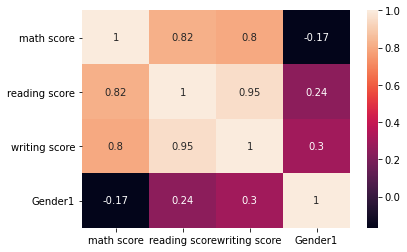

In [9]:
# correlation b/w variables

corr = df.corr()
print(corr)

sns.heatmap(corr, annot=True)
plt.show()

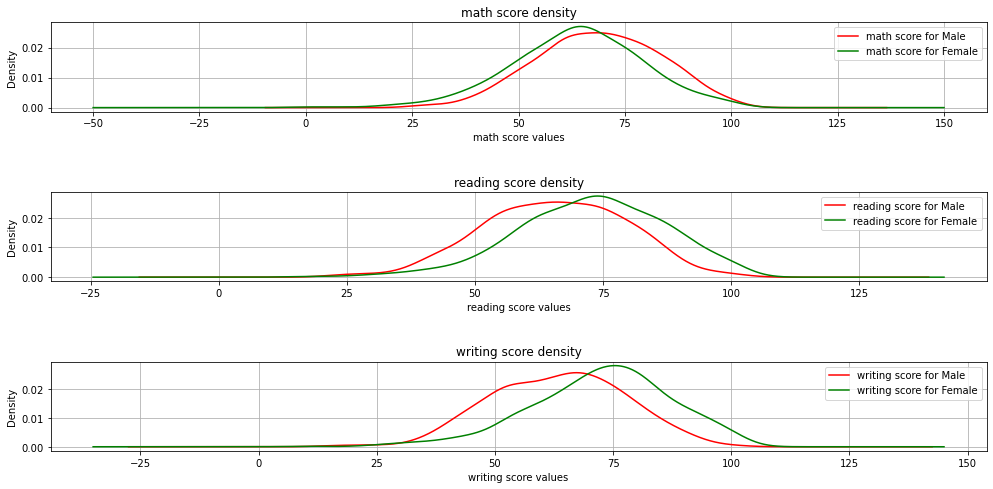

In [10]:
# Plotting densities for female vs male basis score in various subjects
f=df[['math score','reading score','writing score','Gender1']]
def plot_densities(data):
    '''
    Plot features densities depending on the outcome values
    '''
    # change fig size to fit all subplots
    rcParams['figure.figsize'] = 20, 7
    fig, axs = plt.subplots(3, 1)
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        data[data['Gender1'] == 0][column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for Male')
        data[data['Gender1'] == 1][column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for Female')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()

names = list(f.columns)

# plot correlation & densities
plot_densities(f)

math score       15.163080
reading score    14.600192
writing score    15.195657
Gender1           0.499926
average score    14.257326
dtype: float64


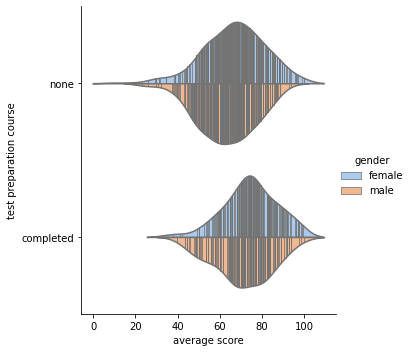

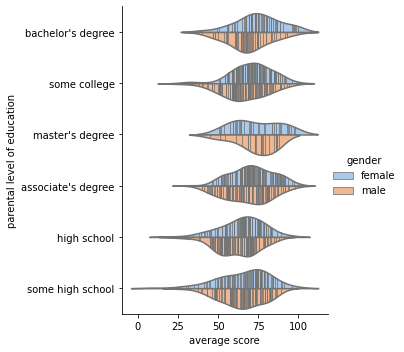

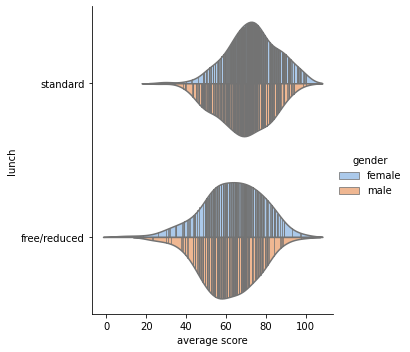

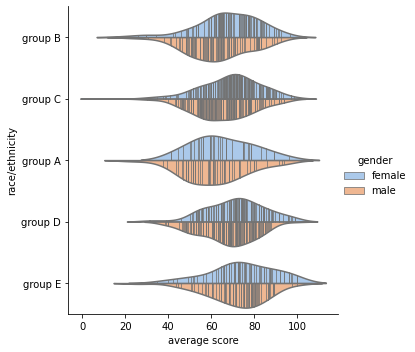

In [11]:
# distribution of test preparation
df['average score']=df[['math score','reading score','writing score']].mean(axis=1)
print(df.std())



sns.catplot(x="average score", y="test preparation course", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df)

sns.catplot(x="average score", y="parental level of education", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df)
sns.catplot(x="average score", y="lunch", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df)
sns.catplot(x="average score", y="race/ethnicity", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df)

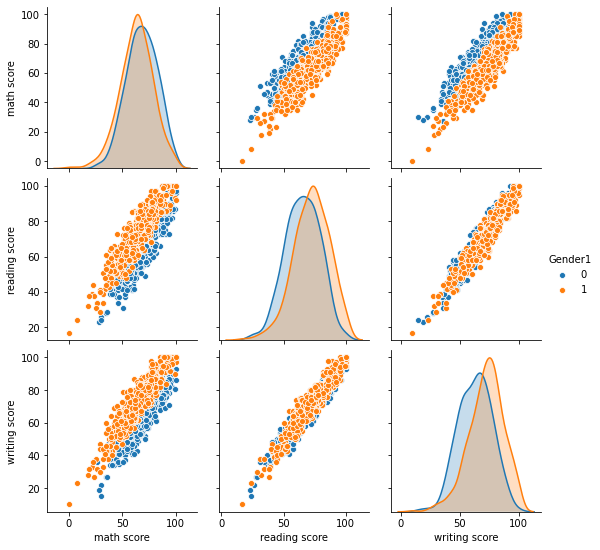

In [12]:

sns.pairplot(f,hue = 'Gender1')

# Data Processing

In [13]:
#Creating Dummy Values
dummy = pd.get_dummies(df[['race/ethnicity','lunch','test preparation course']])
dummy.head(10)

,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,1,0,0,0,0,1,0,1
1,0,0,1,0,0,0,1,1,0
2,0,1,0,0,0,0,1,0,1
3,1,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,1,0,1
5,0,1,0,0,0,0,1,0,1
6,0,1,0,0,0,0,1,1,0
7,0,1,0,0,0,1,0,0,1
8,0,0,0,1,0,1,0,1,0
9,0,1,0,0,0,1,0,0,1


In [14]:
# concatenate dummy df with original df
df1 = pd.concat([df, dummy], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             1000 non-null   object 
 1   race/ethnicity                     1000 non-null   object 
 2   parental level of education        1000 non-null   object 
 3   lunch                              1000 non-null   object 
 4   test preparation course            1000 non-null   object 
 5   math score                         1000 non-null   int64  
 6   reading score                      1000 non-null   int64  
 7   writing score                      1000 non-null   int64  
 8   Gender1                            1000 non-null   int64  
 9   average score                      1000 non-null   float64
 10  race/ethnicity_group A             1000 non-null   uint8  
 11  race/ethnicity_group B             1000 non-null   uint8 

In [15]:
# average of values by gender
df_group = df1.groupby('gender').mean()
df_group

,math score,reading score,writing score,Gender1,average score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
gender,,,,,,,,,,,,,,
female,63.633205,72.608108,72.467181,1.0,69.569498,0.069498,0.200772,0.347490,0.249035,0.133205,0.364865,0.635135,0.355212,0.644788
male,68.728216,65.473029,63.311203,0.0,65.837483,0.109959,0.178423,0.288382,0.275934,0.147303,0.344398,0.655602,0.360996,0.639004


In [16]:
# drop columns for which dummies are created and y variables
x = df1.drop(['race/ethnicity', 'lunch', 'test preparation course', 'parental level of education','gender','average score','Gender1'], axis = 1)

#standardize data
x= (x-np.min(x)) / (np.max(x)-np.min(x))

x.head()

,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.72,0.662651,0.711111,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.69,0.879518,0.866667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.90,0.939759,0.922222,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.47,0.481928,0.377778,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.76,0.734940,0.722222,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [17]:
y = df['Gender1']
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Gender1, dtype: int64

In [18]:
# split into train / test data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 21)

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
classifier = DecisionTreeClassifier(criterion = 'gini', random_state= 0,max_depth=10 )
classifier.fit(x_train, y_train)
y_pre = classifier.predict(x_test)


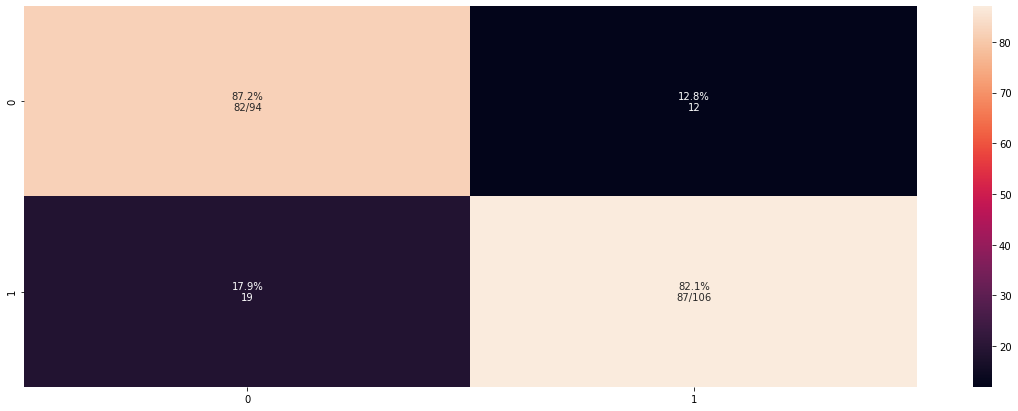

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pre)
sum1 = np.sum(cm, axis=1, keepdims=True)
perc1 = cm / sum1.astype(float) * 100
annot = np.empty_like(cm).astype(str)

nrows, ncols = cm.shape
for i in range(nrows):
            for j in range(ncols):
                c = cm[i, j]
                p = perc1[i, j]
                if i == j:
                    s = sum1[i]
                    annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%.1f%%\n%d' % (p, c)



sns.heatmap(cm, annot=annot, fmt='')


In [22]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.88      0.82      0.85       106

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



In [23]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 0.66
|   |--- feature_0 <= 0.59
|   |   |--- feature_2 <= 0.49
|   |   |   |--- feature_0 <= 0.44
|   |   |   |   |--- feature_2 <= 0.33
|   |   |   |   |   |--- feature_0 <= 0.38
|   |   |   |   |   |   |--- feature_2 <= 0.19
|   |   |   |   |   |   |   |--- feature_0 <= 0.18
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  0.18
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  0.19
|   |   |   |   |   |   |   |--- feature_2 <= 0.27
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  0.27
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.25
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.30
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.30
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  0.25
|   |   |   |   |   |   |   | 

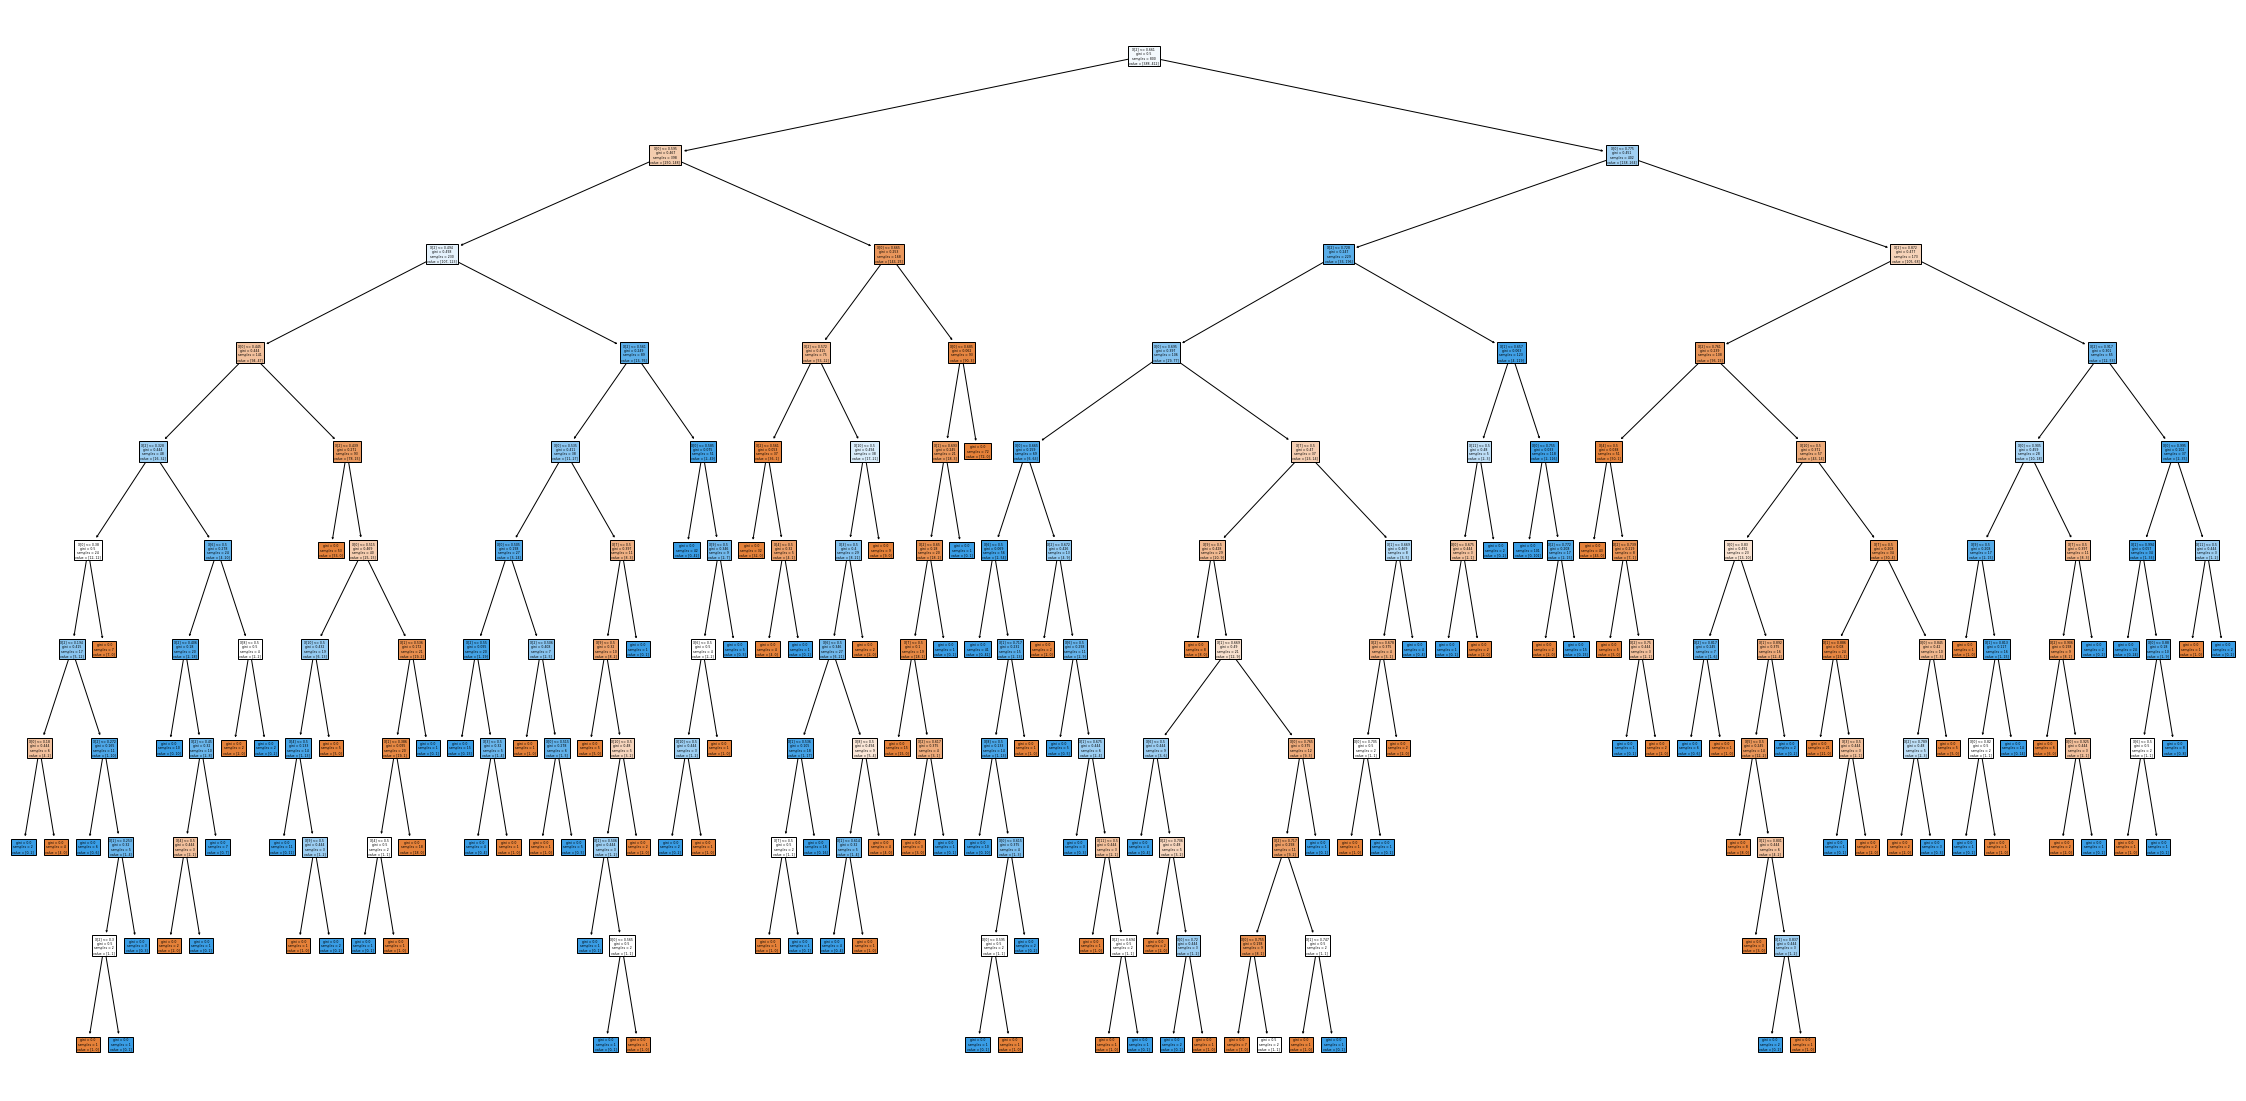

In [24]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, filled=True)

# KNN Classification

In [25]:
from sklearn.neighbors import KNeighborsClassifier


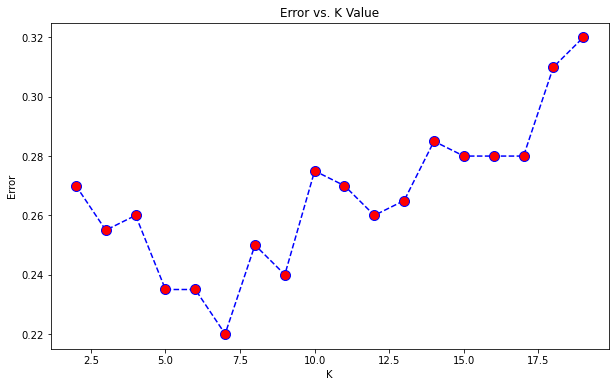

In [26]:
error = []
for i in range(2,20):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred = knn.predict(x_test)
 error.append(np.mean(pred != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(2,20),error,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')

#optimal neighbour count=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pre = knn.predict(x_test)

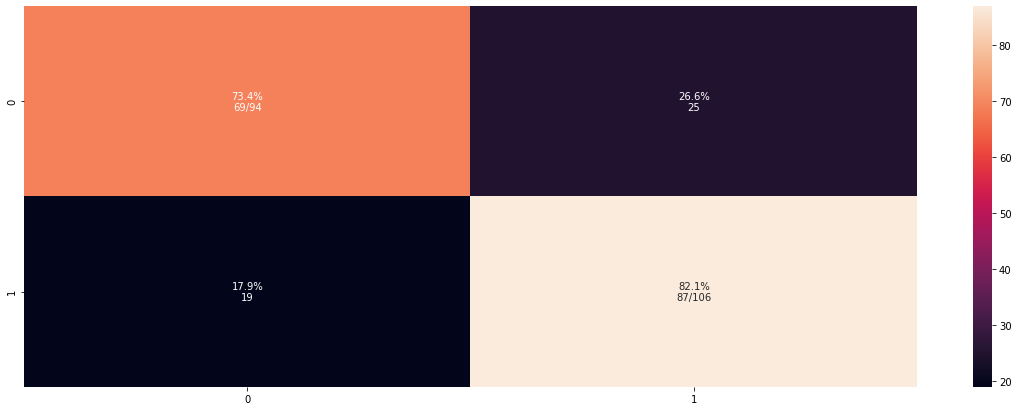

In [27]:
cm = confusion_matrix(y_test, y_pre)
sum1 = np.sum(cm, axis=1, keepdims=True)
perc1 = cm / sum1.astype(float) * 100
annot = np.empty_like(cm).astype(str)

nrows, ncols = cm.shape
for i in range(nrows):
            for j in range(ncols):
                c = cm[i, j]
                p = perc1[i, j]
                if i == j:
                    s = sum1[i]
                    annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%.1f%%\n%d' % (p, c)



sns.heatmap(cm, annot=annot, fmt='')


In [28]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76        94
           1       0.78      0.82      0.80       106

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



# Random Forest

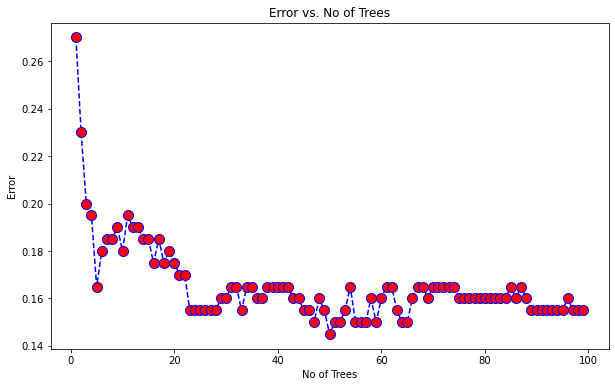

In [29]:
error=[]
from sklearn.ensemble import RandomForestClassifier

for i in range(1,100):
 rfc = RandomForestClassifier(n_estimators = i,random_state = 21,bootstrap = "False",criterion="gini",min_samples_split = 10 , min_samples_leaf = 2)
 rfc.fit(x_train,y_train)
 pred = rfc.predict(x_test)
 error.append(np.mean(pred != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error vs. No of Trees')
plt.xlabel('No of Trees')
plt.ylabel('Error')

rfc = RandomForestClassifier(n_estimators = 50,random_state = 21,bootstrap = "False",criterion="gini",min_samples_split = 10 , min_samples_leaf = 2)
rfc.fit(x_train,y_train)
y_pre = rfc.predict(x_test)

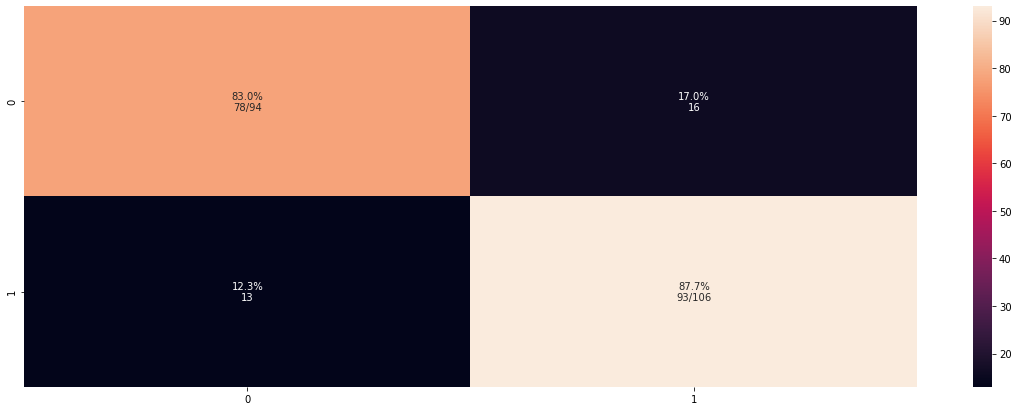

In [30]:
cm = confusion_matrix(y_test, y_pre)
sum1 = np.sum(cm, axis=1, keepdims=True)
perc1 = cm / sum1.astype(float) * 100
annot = np.empty_like(cm).astype(str)

nrows, ncols = cm.shape
for i in range(nrows):
            for j in range(ncols):
                c = cm[i, j]
                p = perc1[i, j]
                if i == j:
                    s = sum1[i]
                    annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
                elif c == 0:
                    annot[i, j] = ''
                else:
                    annot[i, j] = '%.1f%%\n%d' % (p, c)



sns.heatmap(cm, annot=annot, fmt='')

In [31]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        94
           1       0.85      0.88      0.87       106

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

